In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from dummyPy import OneHotEncoder
import random
import pickle

In [2]:
# 读文件
train_file = 'train_sample.csv'
test_file = 'test_sample.csv'
# 写文件
col_counts_file = 'col_counts'
# 存储标签编码和one_hot编码
label_encoder_file = 'label_encoder'
onehot_encoder_file = 'onehot_encoder'

In [3]:
# 不包括id， click的feature
cols = ['hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
# 非features字段
cols_train = ['id', 'click']
cols_test = ['id']
cols_train.extend(cols)
cols_test.extend(cols)

In [4]:
df_train_sample = pd.read_csv(train_file, nrows=10)
df_train_sample

,Unnamed: 0,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,2,15706,320,50,1722,0,35,-1,79
1,1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
2,2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15704,320,50,1722,0,35,100084,79
3,3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15706,320,50,1722,0,35,100084,79
4,4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,...,1,0,18993,320,50,2161,0,35,-1,157
5,5,10000720757801103869,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,...,1,0,16920,320,50,1899,0,431,100077,117
6,6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,...,1,0,20362,320,50,2333,0,39,-1,157
7,7,10000918755742328737,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,...,1,0,20632,320,50,2374,3,39,-1,23
8,8,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,2,15707,320,50,1722,0,35,-1,79
9,9,10001264480619467364,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,...,0,0,21689,320,50,2496,3,167,100191,23


In [5]:
# 分块处理文件
df_train_org = pd.read_csv(train_file, chunksize=10000000, iterator=True)
df_test_org = pd.read_csv(test_file, chunksize=10000000, iterator=True)

cols_counts = {}
for col in cols:
    cols_counts[col] = df_train_sample[col].value_counts()
print(cols_counts)

{'hour': 14102100    10
Name: hour, dtype: int64, 'C1': 1005    9
1002    1
Name: C1, dtype: int64, 'banner_pos': 0    8
1    2
Name: banner_pos, dtype: int64, 'site_id': 1fbe01fe    5
8fda644b    1
d6137915    1
fe8cc448    1
e151e245    1
84c7ba46    1
Name: site_id, dtype: int64, 'site_domain': f3845767    5
7e091613    1
bb1ef334    1
9166c161    1
25d4cfcd    1
c4e18dd6    1
Name: site_domain, dtype: int64, 'site_category': 28905ebd    5
f028772b    3
50e219e0    1
0569f928    1
Name: site_category, dtype: int64, 'app_id': ecad2386    10
Name: app_id, dtype: int64, 'app_domain': 7801e8d9    10
Name: app_domain, dtype: int64, 'app_category': 07d7df22    10
Name: app_category, dtype: int64, 'device_id': a99f214a    9
c357dbff    1
Name: device_id, dtype: int64, 'device_ip': e6f67278    1
9644d0bf    1
f1ac7184    1
b264c159    1
37e8da74    1
05241af0    1
96809ac8    1
ddd2926e    1
e8275b8f    1
b3cf8def    1
Name: device_ip, dtype: int64, 'device_model': 8a4875bd    2
be6db1d7   

In [6]:
# 统计训练集中的字段 不同值个数
for chunk in df_train_org:
    for col in cols:
        cols_counts[col] = cols_counts[col].append(chunk[col].value_counts())

for chunk in df_test_org:
    for col in cols:
        cols_counts[col] = cols_counts[col].append(chunk[col].value_counts())

In [7]:
# 统计
for col in cols:
    cols_counts[col] = cols_counts[col].groupby(cols_counts[col].index).sum()

In [8]:
# 统计
for col in cols:
    cols_counts[col] = cols_counts[col].groupby(cols_counts[col].index).sum()
    cols_counts[col] = cols_counts[col].sort_values(ascending=False)
cols_counts['C21']

79     4468
23     2889
157    2395
221    2384
61     1856
51     1129
33      813
246     809
32      586
48      529
117     394
71      269
52      256
46      199
16      172
17      134
156      91
13       85
91       83
95       69
42       68
15       64
101      53
94       52
171      45
100      25
82       24
93       13
251      12
116      10
111       9
253       6
68        6
90        4
70        3
102       2
112       2
20        1
85        1
Name: C21, dtype: int64

In [9]:
pickle.dump(cols_counts, open(col_counts_file, 'wb'))

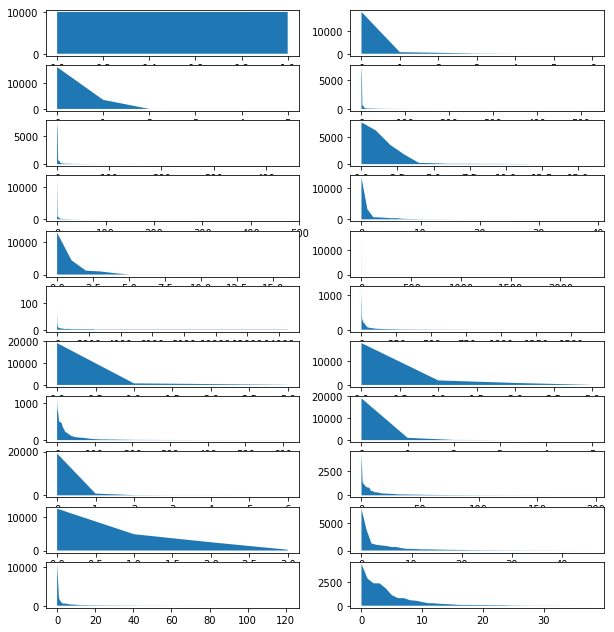

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(10,11))
for i, col in enumerate(cols):
    ax = fig.add_subplot(11, 2, i+1)
    ax.fill_between(np.arange(len(cols_counts[col])), cols_counts[col].get_values())
plt.show()

In [11]:
# 每个字段 只保存前k个字段值
k = 100
col_index = {}
for col in cols:
    col_index[col] = cols_counts[col][0: k-1].index
col_index['hour']

Int64Index([14102100, 14103100], dtype='int64')

In [12]:
# 对变量进行标签编码
lb_enc = {}
for col in cols:
    # 超过前100个value，设置为other
    col_index[col] = np.append(col_index[col], 'other')

for col in cols:
    lb_enc[col] = LabelEncoder()
    lb_enc[col].fit(col_index[col])
# 储存标签编码    
pickle.dump(lb_enc, open(label_encoder_file, 'wb'))
print(label_encoder_file + 'saved')

# one-hot 编码
oh_enc = OneHotEncoder(cols)

for chunk in df_train_org:
    oh_enc.fit(chunk)
    
for chunk in df_test_org:
    oh_enc.fit(chunk)
    
pickle.dump(oh_enc, open(onehot_encoder_file, 'wb'))
print(onehot_encoder_file + 'saved')


label_encodersaved
onehot_encodersaved


In [13]:
oh_enc